In [1]:
import rebound
import sys
#change the next line to reflect where you have downloaded the source code
#sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
sys.path.insert(0, '../src')
import sbdynt as sbd

In [2]:
#change this to point to the local copy
#training_file = '/Users/kvolk/Documents/GitHub/SBDynT/src/TNO-ML-training-data.csv'
training_file = '../src/TNO-ML-training-data.csv'

In [3]:
#read the training data and train the classifier
#return the accuracy score and testing results 
#(though current notebook doesn't do anything with those)
(clf, score, classes_train, classes_test, 
 features_train, features_test, 
 feature_names, classes_dictionary) = sbd.train_and_test_TNO_classifier(training_file)

In [4]:
#this just displays the resulting classifier info
clf

GradientBoostingClassifier(learning_rate=0.15, max_depth=8, max_features='log2',
                           min_samples_split=3, n_estimators=300,
                           random_state=42, subsample=0.9)

In [5]:
print("the classifier has a strict accuracy of %f percent\n" % (100*score))

the classifier has a strict accuracy of 97.594163 percent



In [6]:
#runs an integration (files saved to whatever directory this notebook is run in, will fix later to add options for that)
#NOTE: if clones==2, then this will run a best-fit plus a 3-sigma high and 3-sigma low clone
#otherwise if clones !=2 it will run however many clones you want sampled from the covariance matrix as usual
#if you don't specify clones, then it will run the min/max case

#currentlt this is only set up to do TNOs in JPL's database, will update at some point to broaden that

tno = 'K16SA6D'
clones = 10

new_features, short_simarchive_file, long_simarchive_file = sbd.run_TNO_integration_for_ML(tno=tno,clones=clones)

#the short archive file has the 0.5 Myr integration (at high cadence output) and the long has the 10 Myr integration (lower cadence output)

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulation.py:505: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


In [7]:
#apply the classifier to these integrations
predicted_classes = clf.predict(new_features)
class_probs = clf.predict_proba(new_features)


In [8]:
#print out the results
sbd.print_TNO_ML_results(predicted_classes,classes_dictionary,class_probs,clones=clones)

Clone number, most probable class, probability of most probable class, probability of class-det,probability of Nresonant,probability of scattering,
0, scattering, 1.000000e+00, 2.999276e-10, 1.318582e-09, 1.000000e+00, 
1, scattering, 1.000000e+00, 3.295889e-11, 1.536788e-11, 1.000000e+00, 
2, scattering, 1.000000e+00, 7.283181e-11, 2.032094e-10, 1.000000e+00, 
3, scattering, 1.000000e+00, 1.725318e-10, 2.645228e-10, 1.000000e+00, 
4, scattering, 1.000000e+00, 8.786633e-11, 1.134356e-10, 1.000000e+00, 
5, scattering, 1.000000e+00, 1.127184e-09, 5.199755e-09, 1.000000e+00, 
6, scattering, 1.000000e+00, 1.137846e-10, 3.609867e-10, 1.000000e+00, 
7, scattering, 9.999997e-01, 8.782300e-11, 2.892608e-07, 9.999997e-01, 
8, scattering, 1.000000e+00, 2.314560e-10, 3.322265e-10, 1.000000e+00, 
9, scattering, 1.000000e+00, 9.700254e-11, 2.490958e-10, 1.000000e+00, 
10, scattering, 1.000000e+00, 4.114149e-11, 1.563520e-10, 1.000000e+00, 


In [9]:
#read the 10 Myr archive to make a plot as a check
(flag, a, e, inc, node, aperi, ma, t) = sbd.read_sa_for_sbody(
                            sbody=tno,
                            archivefile=long_simarchive_file,
                            nclones=clones)

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


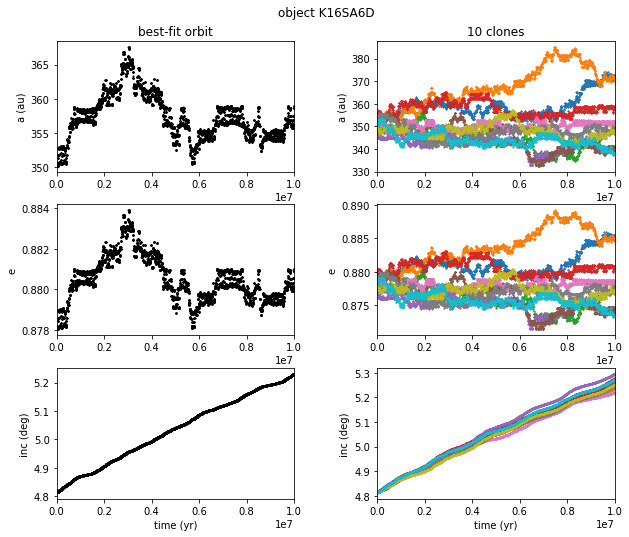

In [10]:
#default plotting function call
flag, fig1 = sbd.plot_aei(sbody=tno,
                          a=a,e=e,inc=inc,t=t,
                          nclones=clones,figfile=None)